Import necessary libraries/modules

In [ ]:
import pandas as pd
#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

Construct a pandas Data-frame object from the Iris plants dataset

In [ ]:
data = '/content/bankDeposit.csv'
dataset = pd.read_csv(data)
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
enc = OrdinalEncoder()
enc.fit(dataset[["job","marital", "education","default","housing","loan","contact","month","poutcome","deposit"]])
dataset[["job","marital", "education","default","housing","loan","contact","month","poutcome","deposit"]] = enc.transform(dataset[["job","marital", "education","default","housing","loan","contact","month","poutcome","deposit"]])
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0.0,1.0,1.0,0.0,2343,1.0,0.0,2.0,5,8.0,1042,1,-1,0,3.0,1.0
1,56,0.0,1.0,1.0,0.0,45,0.0,0.0,2.0,5,8.0,1467,1,-1,0,3.0,1.0
2,41,9.0,1.0,1.0,0.0,1270,1.0,0.0,2.0,5,8.0,1389,1,-1,0,3.0,1.0
3,55,7.0,1.0,1.0,0.0,2476,1.0,0.0,2.0,5,8.0,579,1,-1,0,3.0,1.0
4,54,0.0,1.0,2.0,0.0,184,0.0,0.0,2.0,5,8.0,673,2,-1,0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1.0,2.0,0.0,0.0,1,1.0,0.0,0.0,20,0.0,257,1,-1,0,3.0,0.0
11158,39,7.0,1.0,1.0,0.0,733,0.0,0.0,2.0,16,6.0,83,4,-1,0,3.0,0.0
11159,32,9.0,2.0,1.0,0.0,29,0.0,0.0,0.0,19,1.0,156,2,-1,0,3.0,0.0
11160,43,9.0,1.0,1.0,0.0,0,0.0,1.0,0.0,8,8.0,9,2,172,5,0.0,0.0


Splitting the dataset into training and test sets

In [ ]:
X = dataset.copy().drop(['deposit'],axis=1)
y = dataset['deposit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a Decision-Tree Classifier object using the sklearn defined class and parameter values

In [ ]:
dtree = DecisionTreeClassifier(max_depth=5,criterion='entropy')
dtree = dtree.fit(X_train, y_train) #build the tree on the training set

In [ ]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Obtain the tree's predictions on test set, accuracy on test set and display the tree

In [ ]:
predictions=dtree.predict(X_train)
predictions

array([0., 0., 0., ..., 0., 1., 1.])

In [ ]:
dtree.predict_proba(X_train)

In [ ]:
accuracy_score(y_train, predictions)

0.7939298913652145

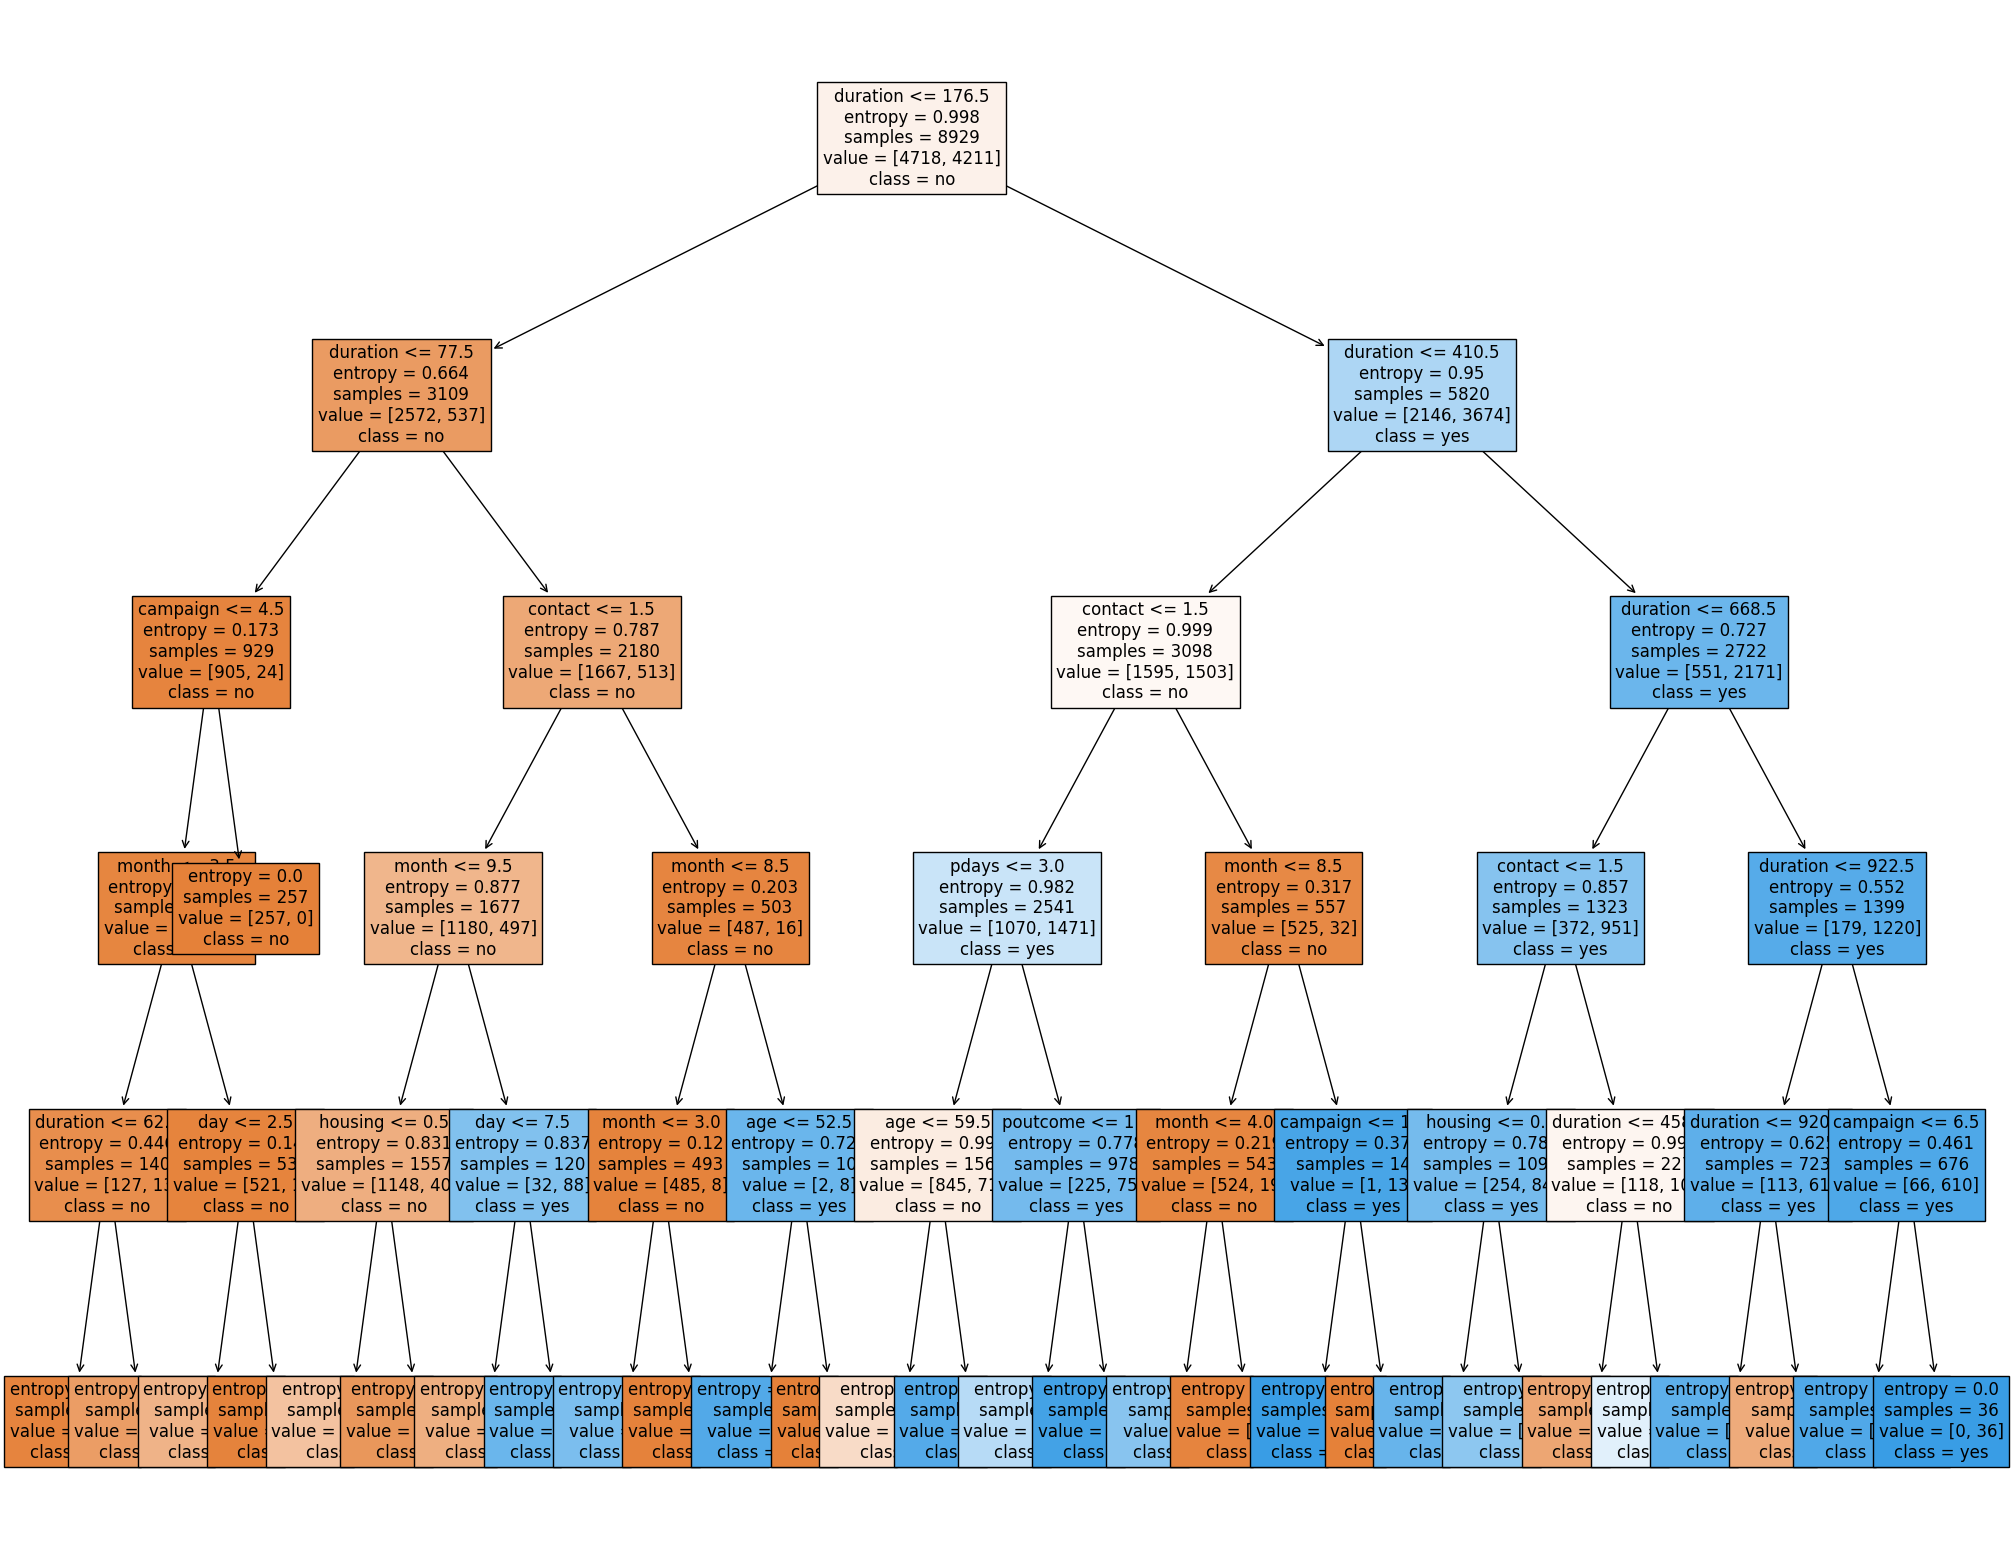

In [ ]:
feature_names = X.columns
feature_names

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,
                   feature_names=feature_names,
                   class_names={0:'no', 1:'yes'}, #fill in the class-labels here for displaying
                   filled=True,
                  fontsize=12)